<div align="center">
    <h1>Códigos usados para el análisis de datos</h1>
</div>

<div align="center">
  <img src="https://raw.githubusercontent.com/danmascarilla/ONLINE_DS_THEBRIDGE_DaniMascarilla/main/assets/logo.png" alt="Logo The Bridge" />
</div>

<div align="center">
  <img src="https://media.licdn.com/dms/image/v2/C4E12AQHlSSKkhXlNvw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1558030526375?e=2147483647&v=beta&t=4qX9Ak_WdDJVBDkJtaivU0c9VT4NVH0f9AV2HUTse54" alt="" />
</div>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df_meta = pd.read_csv('./src/data/metacritic-games-data.csv')
df_sales = pd.read_csv('./src/data/vgsales.csv') # Dataset de Kaggle sugerido

# 2. Limpieza inicial
df_meta['name'] = df_meta['name'].str.strip()
df_sales['Name'] = df_sales['Name'].str.strip()

# 3. Merge (Unión): Unimos por nombre y plataforma
df = pd.merge(df_meta, df_sales, left_on=['name', 'platform'], right_on=['Name', 'Platform'], how='inner')

# 4. Transformación de tipos y escalas
df = df[df['user score'] != 'tbd'] # Eliminar pendientes
df['user score'] = df['user score'].astype(float)
df['user_score_100'] = df['user score'] * 10  # Normalizar a escala 100
df['r-date'] = pd.to_datetime(df['r-date'])
df['year'] = df['r-date'].dt.year

# Eliminar columnas duplicadas tras el merge
df.drop(['Name', 'Platform'], axis=1, inplace=True)

print(f"Dataset listo: {df.shape[0]} videojuegos vinculados con éxito.")

Dataset listo: 2079 videojuegos vinculados con éxito.


### Análisis de Correlación

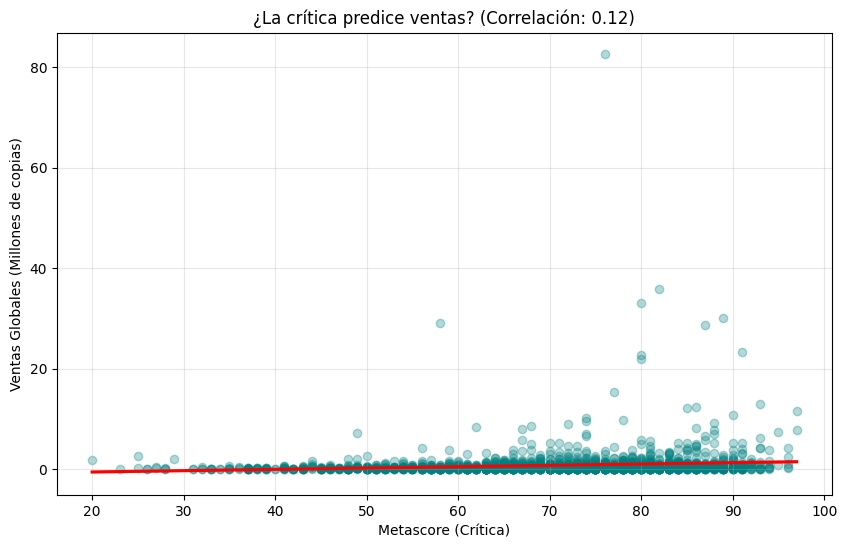

In [12]:
# Calcular correlación de Pearson entre Nota de Crítica y Ventas Globales
corr, _ = pearsonr(df['score'], df['Global_Sales'])

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='score', y='Global_Sales', 
            scatter_kws={'alpha':0.3, 'color':'teal'}, 
            line_kws={'color':'red'})

plt.title(f'¿La crítica predice ventas? (Correlación: {corr:.2f})')
plt.xlabel('Metascore (Crítica)')
plt.ylabel('Ventas Globales (Millones de copias)')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\danma\AppData\Local\Temp\ipykernel_37052\913126666.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='segmento', y='Global_Sales', palette='viridis', estimator=np.mean)


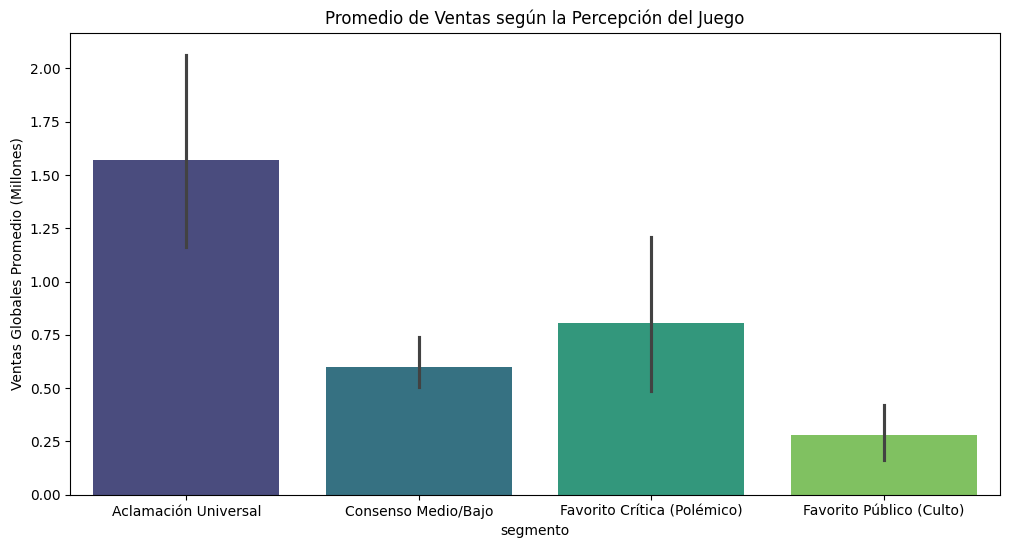

In [13]:
# Calcular la brecha (Diferencia de opinión)
df['gap'] = df['score'] - df['user_score_100']

def categorizar_consenso(row):
    if row['score'] >= 80 and row['user_score_100'] >= 80: return 'Aclamación Universal'
    if row['score'] >= 80 and row['user_score_100'] < 60: return 'Favorito Crítica (Polémico)'
    if row['score'] < 60 and row['user_score_100'] >= 80: return 'Favorito Público (Culto)'
    return 'Consenso Medio/Bajo'

df['segmento'] = df.apply(categorizar_consenso, axis=1)

# Visualizar ventas por segmento
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='segmento', y='Global_Sales', palette='viridis', estimator=np.mean)
plt.title('Promedio de Ventas según la Percepción del Juego')
plt.ylabel('Ventas Globales Promedio (Millones)')
plt.show()

--- TOP 5 JOYAS OCULTAS (Alta nota, bajas ventas) ---
                              name  score  Global_Sales
4                   The Orange Box     96          0.14
6                         BioShock     96          0.41
10                   Mass Effect 2     94          0.40
11     Grand Theft Auto: Vice City     94          0.04
13  The Elder Scrolls IV: Oblivion     94          0.26


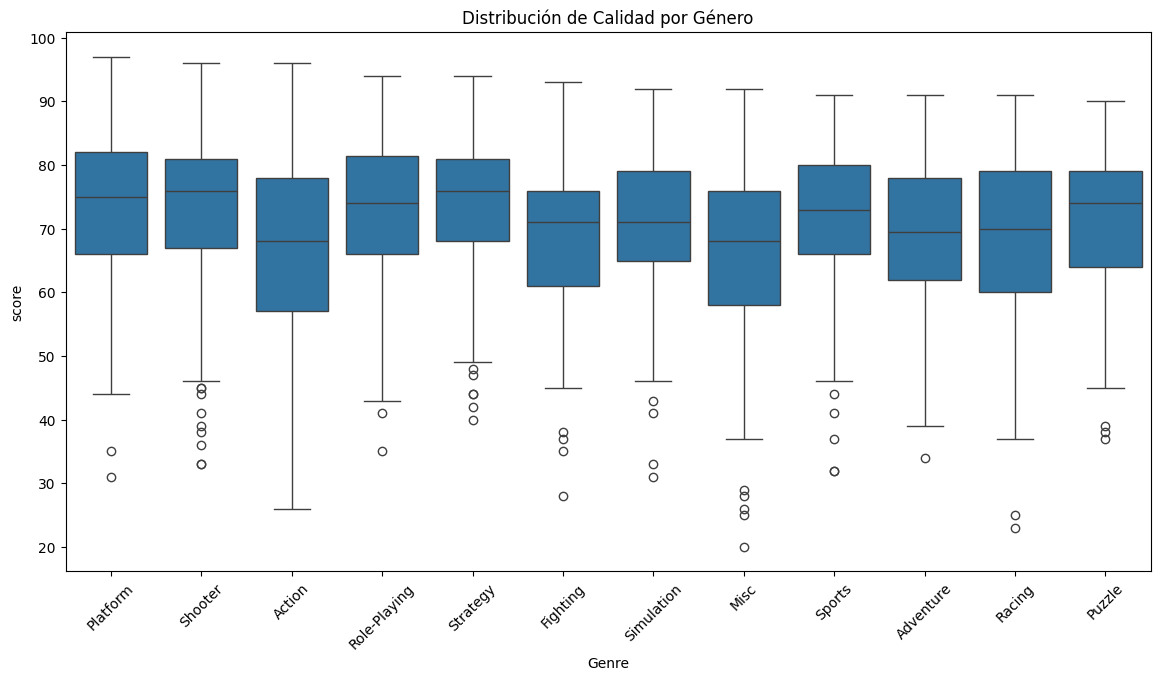

In [14]:
# Identificar Joyas Ocultas
joyas = df[(df['score'] >= 90) & (df['Global_Sales'] < 0.5)]

print("--- TOP 5 JOYAS OCULTAS (Alta nota, bajas ventas) ---")
print(joyas[['name', 'score', 'Global_Sales']].sort_values(by='score', ascending=False).head(5))

# Rendimiento por Género
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Genre', y='score')
plt.xticks(rotation=45)
plt.title('Distribución de Calidad por Género')
plt.show()